In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [ ]:
# Loading the MNIST data from keras


(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
type(xtrain)

numpy.ndarray

In [ ]:
print(xtrain.shape, ytrain.shape, xtest.shape, ytest.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


<function matplotlib.pyplot.show(close=None, block=None)>

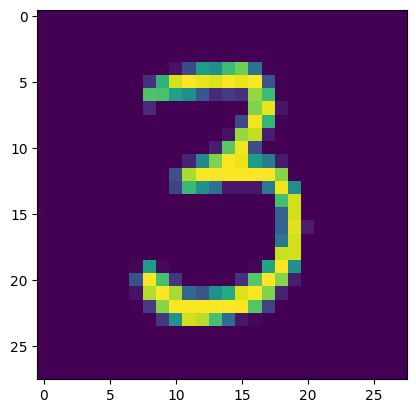

In [ ]:
plt.imshow(xtrain[50])
plt.show

In [ ]:
print(xtrain[50])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  12  56 140 126 175 200  96   2
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  35 166 238 254 246 242 253 246 254  67
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 184 182 146 127  70  30  45  36 215 175
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30   0   0   0   0   0   0   0 207 246
   14   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  5

In [ ]:
print(ytrain[50])

3


In [ ]:
print(np.unique(ytrain))
print(np.unique(ytest))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
# Normalisation

xtrain = xtrain/255
xtest = xtest/255

In [ ]:
print(xtrain[50])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
# Building a Neural Network

model = keras.Sequential([
                        keras.layers.Flatten(input_shape = (28,28)),
                        keras.layers.Dense(50, activation = 'relu'),
                        keras.layers.Dense(50, activation = 'relu'),
                        keras.layers.Dense(50, activation = 'sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# compiling the model

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.fit(xtrain, ytrain, epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8193 - loss: 0.6871
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9522 - loss: 0.1570
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9667 - loss: 0.1099
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9735 - loss: 0.0850
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9791 - loss: 0.0690
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9835 - loss: 0.0569
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9855 - loss: 0.0471
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9881 - loss: 0.0394
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9891 - loss: 0.0335
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9903 - loss: 0.0287


training data accuracy = 99%

In [ ]:
#accuracy on testing data

loss, accuracy = model.evaluate(xtest, ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9680 - loss: 0.1214


In [ ]:
print(xtest.shape)

(10000, 28, 28)


<function matplotlib.pyplot.show(close=None, block=None)>

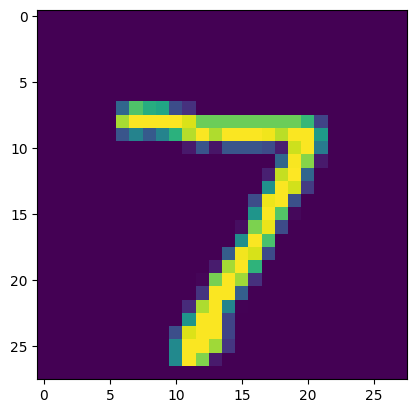

In [ ]:
# first data point xtest
plt.imshow(xtest[0])
plt.show


In [ ]:
print(ytest[0])

7


In [ ]:
ypred = model.predict(xtest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
print(ypred.shape)

(10000, 50)


In [ ]:
print(ypred[0])

[3.31404172e-02 8.78815365e-04 3.53300363e-01 9.98933613e-01
 5.47161799e-05 2.69035965e-01 1.99811314e-08 9.99998212e-01
 5.30274846e-02 9.90046918e-01 1.11793462e-07 7.97356790e-07
 6.73485800e-08 4.58336785e-07 1.11539933e-08 2.71866565e-08
 1.40021186e-07 1.49667678e-09 1.03687498e-07 3.38200152e-08
 4.61654892e-08 5.71248471e-09 6.26602741e-07 1.13605001e-08
 7.19416164e-07 1.69518842e-07 1.37993055e-07 8.22715620e-08
 5.00600716e-09 1.11974137e-08 3.14515658e-09 6.30753449e-09
 2.61396647e-08 7.12334440e-07 6.21919138e-09 1.82699420e-08
 1.76406478e-09 5.27704117e-07 2.46314169e-08 1.58666302e-09
 9.87814630e-08 1.03121046e-07 2.62861363e-07 2.96028816e-06
 9.29131829e-07 4.78250229e-07 1.60649396e-08 1.76572868e-07
 2.13826734e-09 1.51250426e-08]


In [ ]:
labelforfirsttestimage = np.argmax(ypred[0])
print(labelforfirsttestimage)

7
